# Airfoil Self-Noise after resonance of diferent Free-stream velocity


### Importing libraries 

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Manipulating data 

In [23]:
df = pd.read_csv("AirfoilSelfNoise.csv")
df = df[df["alpha"] == 0]
df = df[df["c"] == 0.3048]
df1 = df
df2 = df
df3 = df
df1 = df1[df1["U_infinity"] == 31.7][df1["f"] > 1600]
df2 = df2[df2["U_infinity"] == 55.5][df2["f"] > 2000]
df3 = df3[df3["U_infinity"] == 71.3][df3["f"] > 2500]


df3.head()

/tmp/ipykernel_27834/4245623569.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df1["U_infinity"] == 31.7][df1["f"] > 1600]
/tmp/ipykernel_27834/4245623569.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df2["U_infinity"] == 55.5][df2["f"] > 2000]
/tmp/ipykernel_27834/4245623569.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df3[df3["U_infinity"] == 71.3][df3["f"] > 2500]


,f,alpha,c,U_infinity,delta,SSPL
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541
10,8000,0.0,0.3048,71.3,0.002663,117.151


### Preparing Data

In [24]:
X1 = df1['f'].values
Y1 = df1['SSPL'].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, train_size=0.8, test_size=0.2, random_state=5000)
X2 = df2['f'].values
Y2 = df2['SSPL'].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, train_size=0.8, test_size=0.2, random_state=5000)
X3 = df3['f'].values
Y3 = df3['SSPL'].values
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, train_size=0.8, test_size=0.2, random_state=5000)

## Create the linear regression models

In [25]:
model1 = LinearRegression()
model1.fit(x_train1.reshape(-1,1), y_train1)
model2 = LinearRegression()
model2.fit(x_train2.reshape(-1,1), y_train2)
model3 = LinearRegression()
model3.fit(x_train3.reshape(-1,1), y_train3)

LinearRegression()

### Calculate predicts 

In [26]:
y_predict1 = model1.predict(x_test1.reshape(-1,1))
y_predict2 = model2.predict(x_test2.reshape(-1,1))
y_predict3 = model3.predict(x_test3.reshape(-1,1))

### Calculate accuracy

In [27]:
train_accuracy = model1.score(x_train1.reshape(-1,1), y_train1)
test_accuracy = model1.score(x_test1.reshape(-1,1), y_test1)

## Plotting 

Text(0.5, 1.0, 'Actual Data (Dots) vs Predicted Data (line)')

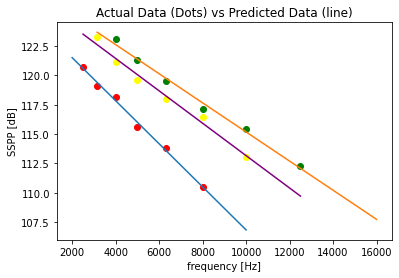

In [28]:
%matplotlib inline
plt.scatter(x_train1,y_train1,color='red')
plt.plot(x_test1,y_predict1)
plt.scatter(x_train2,y_train2,color='yellow')
plt.plot(x_test2,y_predict2,color='purple')
plt.scatter(x_train3,y_train3,color='green')
plt.plot(x_test3,y_predict3)
plt.xlabel('frequency [Hz]')
plt.ylabel('SSPP [dB]')
plt.title('Actual Data (Dots) vs Predicted Data (line)')

Text(0.5, 1.0, 'Origin Data')

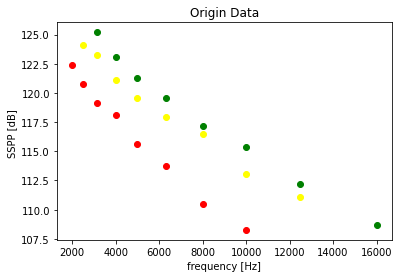

In [29]:
%matplotlib inline
plt.scatter(X1,Y1, color ='red')
plt.scatter(X2,Y2,color='yellow')
plt.scatter(X3,Y3,color='green')
plt.xlabel('frequency [Hz]')
plt.ylabel('SSPP [dB] ')
plt.title('Origin Data')

Text(0.5, 1.0, 'trained Data (Dots)')

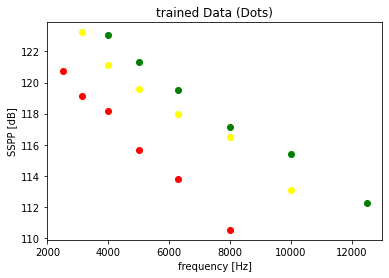

In [30]:
%matplotlib inline
plt.scatter(x_train1,y_train1,color='red')
plt.scatter(x_train2,y_train2,color='yellow')
plt.scatter(x_train3,y_train3,color='green')
plt.xlabel('frequency [Hz]')
plt.ylabel('SSPP [dB]')
plt.title('trained Data (Dots)')